4.992161446991919
[3.0651871284530388, 2.5659709837538465, 2.066754839054655, 1.567538694355463, 1.0683225496562712]


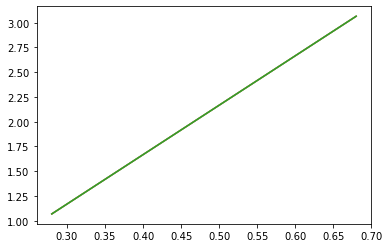

In [90]:
import math
import matplotlib.pyplot as plt
from scipy import stats
#assumtions:
    #assume laminar flow (Nre < 2000)
    #assume alpha = 1 (velocity profile at max)
    #assume v1 = 0 (very small flow at the start)
    #assume 1 bend for an empty bag

# variables:
g = 9.81              # gravity (m/s^2)
#q2 = 3.3333 * 10**-8  # flow rate going into baby(m^3/s)
d = 0.0011    # internal tube diameter for 5 French (m)
rho = 950           # density of milk (kg/m^3)
l_total = 0.875       # total length of tube (m)
mu = 0.0046         # viscosity of milk (Pa*s)
h_full = 0.084        #height of fluid in syringe (m)
p1 = p0 + rho*g*h_full
p0 = 0                # atmospheric gauge pressure 
#h_diff = 0.15          #Height between top of syringe and bottom of tube -----> CHANGE
#p2 = rho*g*h_diff # pressure in baby's stomach (Pa)


def get_flowrate(hf):
    v2 = (hf*rho*d**2)/(32*mu*l_total)
    flow_rate = v2*math.pi*(d/2)**2
    convertion_rate = 6*10**7
    return flow_rate*convertion_rate

def get_headloss_friction(h,h_diff):
    p2 = rho*g*h_diff # pressure in baby's stomach (Pa)
    hf = (g*h)-(p2-p1)/rho
    return hf

def plot_slope(x,y,ax):
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    def myfunc(x):
        return slope * x + intercept
    mymodel = list(map(myfunc, x))
    ax.plot(x,y)
    ax.plot(x, mymodel)
    return slope
if __name__ == '__main__':
    #v2 = get_velocity_into_baby();

#SOLVE FOR 5 FRENCH:
    #print('\nSolved Heights for 5 French Tubing:')
    #CASE 1: 1 Bend at mouth (90 degrees) (bag is empty)
    hf1_28 = get_headloss_friction(0.28,0.15)
    hf1_38 = get_headloss_friction(0.38,0.15)
    hf1_48 = get_headloss_friction(0.48,0.15)
    hf1_58 = get_headloss_friction(0.58,0.15)
    hf1_68 = get_headloss_friction(0.68,0.15)
    flow_rate_28 = get_flowrate(hf1_28)
    flow_rate_38 = get_flowrate(hf1_38)
    flow_rate_48 = get_flowrate(hf1_48)
    flow_rate_58 = get_flowrate(hf1_58)
    flow_rate_68 = get_flowrate(hf1_68)
    x = [0.68, 0.58,0.48,0.38,0.28]
    avg_flowrate = [flow_rate_68,flow_rate_58,flow_rate_48,flow_rate_38,flow_rate_28]
    fig1, ax1 = plt.subplots(1,1)
    ax1.plot(x,avg_flowrate)
    regres_slope = plot_slope(x,avg_flowrate,ax1)
    print(regres_slope)
    print(avg_flowrate )
#SOLVE FOR 6.5 FRENCH:
    # print('\nSolved Heights for 6 French Tubing:')
    # # CASE 1: 1 Bend at mouth (90 degrees) (bag is empty)
    # hf1 = get_headloss_friction(get_velocity_into_baby(d_6French), k_bend_90deg, d_6French);
    # h_empty = get_height(hf1, 0, d_6French);
    # print('The height for an empty bag of feed should be', round(h_empty, 4), 'm above the baby\'s stomach')

    # #CASE 2: 2 Bends, one at mouth (90 degrees), one at 45 degree (bag is half empty)
    # hf2 = get_headloss_friction(get_velocity_into_baby(d_6French), k_bend_90deg + k_bend_45deg,d_6French);
    # h_semifull = get_height(hf2,p1_half_full,d_6French);
    # print('The height for a semi-full bag of feed should be', round(h_semifull, 4),'m above the baby\'s stomach')

    # #CASE 3: 2 Bends, one at mouth (90 degrees), one at 90 degree (bag is full)
    # hf3 = get_headloss_friction(get_velocity_into_baby(d_6French), k_bend_90deg + k_bend_90deg,d_6French);
    # h_fullbag = get_height(hf3, p1_full,d_6French);
    # print('The height for a full bag of feed should be', round(h_fullbag, 4), 'm above the baby\'s stomach')


